In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 

In [2]:
# Parameters 
IMG_HEIGHT = 64 
IMG_WIDTH = 64 
NUM_CHANNELS = 3 # RGB 
NUM_CLASSES = 2 
NUM_SAMPLES = 1000 # Number of simulated images

In [4]:
# Create random image data and labels 
# Each "image" is a 64x64x3 array flattened to 12288 features 
X = np.random.randint(0, 256, size=(NUM_SAMPLES, IMG_HEIGHT*IMG_WIDTH*NUM_CHANNELS)) 
y = np.random.choice(['cat','dog'], size=NUM_SAMPLES)

In [5]:
# Create a DataFrame 
df = pd.DataFrame(X) 
df['label'] = y 
 
print(" Sample DataFrame:") 
print(df.head()) 

 Sample DataFrame:
     0    1    2    3    4    5    6    7    8    9  ...  12279  12280  12281  \
0  233  244  150  251   15   54  197  171  110   22  ...     91    198     79   
1   78   30  206   70   59  218  168  103   49  253  ...    202     49     35   
2  179  235   10   50  138  253  192  128   31   30  ...      4    148     76   
3  188   87   60   35   92  252   37  171   38   61  ...    232     83    235   
4  206  165  172  112  161  173  193  238  171   51  ...     72      6    235   

   12282  12283  12284  12285  12286  12287  label  
0    208    116     84    156     42     78    cat  
1     80     99     36     21    172    210    dog  
2    213    222     62    168     55     94    dog  
3     23     30    120     56     85     28    cat  
4    157    249    199    155    170    138    cat  

[5 rows x 12289 columns]


In [6]:
# Separate features and labels 
X = df.drop('label', axis=1).values 
y = df['label'].values 

In [7]:
# Encode labels 
le = LabelEncoder() 
y = le.fit_transform(y) # cat=0, dog=1 

In [8]:
# Reshape X to (num_samples, IMG_HEIGHT, IMG_WIDTH, 3) 
X = X.reshape(-1, IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS).astype('float32') / 255.0 

In [9]:
# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [10]:
# Build CNN model 
model = Sequential([ 
Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)), 
MaxPooling2D(2,2), 
 
Conv2D(64, (3,3), activation='relu'), 
MaxPooling2D(2,2), 
 
Flatten(), 
Dense(128, activation='relu'), 
Dropout(0.5), 
Dense(1, activation='sigmoid') # Binary classification 
]) 

c:\Users\shris\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model 
history = model.fit( 
X_train, y_train, 
validation_data=(X_test, y_test), 
epochs=5, batch_size=32 
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4925 - loss: 0.7312 - val_accuracy: 0.5350 - val_loss: 0.6922
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5075 - loss: 0.6935 - val_accuracy: 0.5350 - val_loss: 0.6929
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5125 - loss: 0.6932 - val_accuracy: 0.5350 - val_loss: 0.6925
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accuracy: 0.5350 - val_loss: 0.6923
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5138 - loss: 0.6929 - val_accuracy: 0.5350 - val_loss: 0.6922


In [13]:
# Evaluate 
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5350 - loss: 0.6922

Test Accuracy: 53.50%


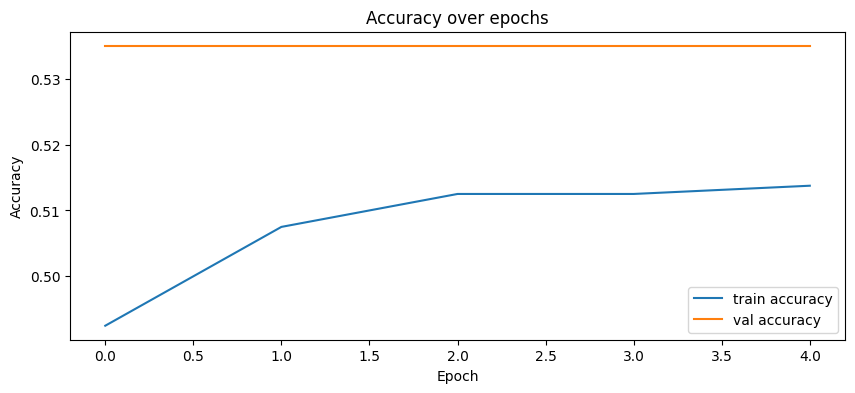

In [14]:
# Plot training history 
plt.figure(figsize=(10,4)) 
plt.plot(history.history['accuracy'], label='train accuracy') 
plt.plot(history.history['val_accuracy'], label='val accuracy') 
plt.title('Accuracy over epochs') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show() 

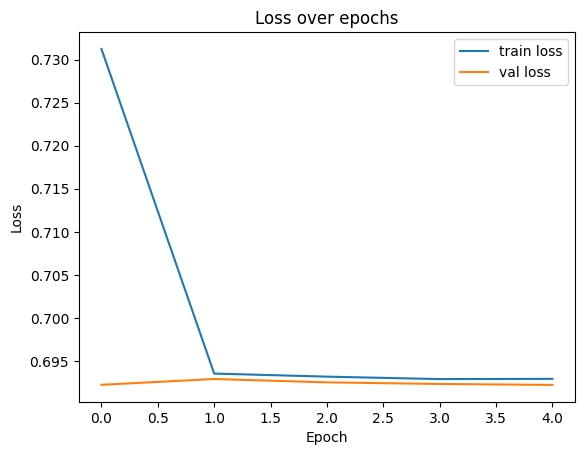

In [15]:
plt.plot(history.history['loss'], label='train loss')  
plt.plot(history.history['val_loss'], label='val loss')  
plt.title('Loss over epochs') 
plt.xlabel('Epoch') 
plt.ylabel('Loss')  
plt.legend()  
plt.show() 